In [ ]:
%pip install --upgrade langchain langchain-community langchain-core langchain-ollama langchainhub langchain-qdrant langchain-text-splitters langsmith langchain-google-genai 'ollama<0.4.0'

In [ ]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = "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"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "rag-massed-compute"
os.environ["OLLAMA_URL"] = 'http://localhost:11434'
os.environ["OLLAMA_CHAT_MODEL_ID"] = "llama3.1:latest"
os.environ["OLLAMA_EMBEDDING_MODEL_ID"] = "bge-large"
os.environ["QDRANT_API_KEY"] = ""
os.environ["QDRANT_CLUSTER_URL"] = ""

In [ ]:
OLLAMA_URL= os.environ["OLLAMA_URL"]
OLLAMA_CHAT_MODEL_ID = os.environ["OLLAMA_CHAT_MODEL_ID"]
OLLAMA_EMBEDDING_MODEL_ID = os.environ["OLLAMA_EMBEDDING_MODEL_ID"]
QDRANT_API_KEY = ''
QDRANT_CLUSTER_URL = ''

In [ ]:
import csv
import json

def csv_to_json(csv_file_path, json_file_path):
    # Open the CSV file
    with open(csv_file_path, mode='r', encoding='utf-8') as csv_file:
        csv_reader = csv.DictReader(csv_file)

        # Prepare a list to hold JSON data
        json_data = []

        # Convert each row in CSV to the JSON format
        for row in csv_reader:
            json_row = {
                "id": int(row["id"]),
                "name": row["name"],
                "brand": row["brand"],
                "category": row["category"],
                "price": float(row["price"]),
                "ingredients": row["ingredients"].split(", ") if row["ingredients"] else [],
                "key_ingredients": row["key_ingredients"].split(", ") if row["key_ingredients"] else [],
                "benefits": row["benefits"].split(", ") if row["benefits"] else [],
                "side_effects": row["side_effects"] if row["side_effects"] else None,
                "is_natural": int(row["is_natural"]),
                "concentrations": row["concentrations"],
                "usage": row["usage"],
                "application_tips": row["application_tips"],
                "skin_types": row["skin_types"].split(", ") if row["skin_types"] else [],
                "skin_concerns": row["skin_concerns"].split(", ") if row["skin_concerns"] else [],
                "allergens": row["allergens"] if row["allergens"] else None,
                "sensitivities": row["sensitivities"] if row["sensitivities"] else None
            }
            json_data.append(json_row)

    # Write JSON data to a file
    with open(json_file_path, mode='w', encoding='utf-8') as json_file:
        json.dump(json_data, json_file, indent=4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file_path = '/content/drive/MyDrive/4th year research/Development/data/products.csv'
json_file_path = '/content/drive/MyDrive/4th year research/Development/data/products.json'

In [ ]:
csv_to_json(csv_file_path, json_file_path)
print(f"CSV data has been successfully converted to JSON and saved to {json_file_path}")

CSV data has been successfully converted to JSON and saved to /content/drive/MyDrive/4th year research/Development/data/products.json


In [ ]:
#read the content of json file
with open('/content/drive/MyDrive/4th year research/Development/data/products.json', 'r') as f:
    products_json = json.load(f)

In [ ]:
def generate_product_profiles(products_json):
    product_docs = []

    for product in products_json:
        # Prepare template strings
        ingredients_list = '\n'.join(f"- {ingredient}" for ingredient in product.get("ingredients", []))
        key_ingredients_list = '\n'.join(f"- {key_ingredient}" for key_ingredient in product.get("key_ingredients", []))
        benefits_list = '\n'.join(f"- {benefit}" for benefit in product.get("benefits", []))
        side_effects_list = f"- {product['side_effects']}" if product["side_effects"] else "None"
        application_tips_list = product["application_tips"] if product["application_tips"] else "None"
        skin_types_list = '\n'.join(f"- {skin_type}" for skin_type in product.get("skin_types", []))
        skin_concerns_list = '\n'.join(f"- {skin_concern}" for skin_concern in product.get("skin_concerns", []))
        allergens_list = f"- {product['allergens']}" if product["allergens"] else "None"
        sensitivities_list = f"- {product['sensitivities']}" if product["sensitivities"] else "None"

        # Format the product profile
        product_profile = f"""
            Product Profile : {product["id"]}
            ---------------

            Basic Information
            -----------------
            Name: {product["name"]}
            Brand: {product["brand"]}
            Category: {product["category"]}
            Price: LKR{product["price"]:.2f}
            Is Natural: {product["is_natural"]}
            Ingredient concentrations level: {product["concentrations"]}

            Composition
            -----------
            Ingredients:
            {ingredients_list}

            Key Ingredients:
            {key_ingredients_list}

            Benefits and Usage
            ------------------
            Benefits:
            {benefits_list}

            Side Effects:
            {side_effects_list}

            Usage Instructions:
            {product["usage"]}

            Application Tips:
            {application_tips_list}

            Skin Compatibility
            ------------------
            Suitable for Skin Types:
            {skin_types_list}

            Addresses Skin Concerns:
            {skin_concerns_list}

            Special Considerations
            ----------------------
            Allergens:
            {allergens_list}

            Sensitivities:
            {sensitivities_list}
        """

        # Add formatted profile to the list
        product_docs.append({
            "template": product_profile.strip(),
            "metadata": {
                "id": product["id"],
                "name": product["name"],
                "brand": product["brand"],
                "category": product["category"],
                "price": product["price"]
            }
        })

    return product_docs

In [ ]:
product_docs = generate_product_profiles(products_json)

In [ ]:
#print formatted dictionary
for doc in product_docs[:2]:
    print(doc)

### Generate engaging product descriptions using product profiles

In [ ]:
GEMINI_API_KEY=userdata.get('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GEMINI_API_KEY

In [ ]:
product_copywrite_prompt = """
You are an expert product copywriter. Based on the given product profile, write a professional and engaging product description that covers all the essential details, benefits, usage instructions, and any special considerations.
Create a summary discription of a skincare product based on the given structured product details.
Use only then given product information and phrase them as use see fit.
Don't remove any vital information from the product profile.
Be accurate and through.

Product Profile:
{product_profile}

Product Description:
"""

### Product Copywriter Agent

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI

def product_copywriter_agent(product_profile, prompt_template):
  prompt = PromptTemplate(input_variables=["product_profile"], template=prompt_template)

  agent = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_retries=2,
  )

  product_copywrite_chain = LLMChain(llm=agent, prompt=prompt)

  product_description = product_copywrite_chain.run(product_profile=product_profile)

  return product_description

### Use agent to get product descriptions

In [ ]:
import time

product_descriptions = []

for doc in product_docs:
  agent_response = product_copywriter_agent(doc["template"], product_copywrite_prompt)
  product_description = {
      "id": doc["metadata"]["id"],
      "metadata": doc["metadata"],
      "content": agent_response
  }
  product_descriptions.append(product_description)
  print(f"Product description for product {doc['metadata']['id']} generated")
  time.sleep(3)

### Write product descriptions to a json file

In [ ]:
output_file = "/content/drive/MyDrive/4th year research/Development/data/product_descriptions.json"

In [ ]:
with open(output_file, "w") as file:
    json.dump(product_descriptions, file, indent=4)

print(f"Product description written to {output_file}")

Product description written to /content/drive/MyDrive/4th year research/Development/data/product_descriptions.json


### Read product descriptions from the json file

In [ ]:
# read from the product_descriptions json
with open(output_file, 'r') as f:
    product_descriptions = json.load(f)

In [ ]:
len(product_descriptions)

90

In [ ]:
product_descriptions[:2]

[{'id': 1,
  'metadata': {'id': 1,
   'name': 'Himalaya Purifying Neem Face Wash 100ml',
   'brand': 'Himalaya',
   'category': 'Face Wash',
   'price': 1334.8},
  'content': 'Himalaya Purifying Neem Face Wash (100ml) is a natural, daily face wash formulated to purify your skin and remove impurities.  Harnessing the power of Neem and Turmeric, this cleanser effectively addresses acne and oil control, making it suitable for all skin types.  Simply apply to a wet face, lather, and rinse. While generally well-tolerated, some individuals sensitive to Turmeric may experience dryness.  For LKR 1334.80, experience the clarifying benefits of this natural face wash from a trusted brand like Himalaya.\n'},
 {'id': 2,
  'metadata': {'id': 2,
   'name': 'Dr. Rashel Intimate Magic Pink Cream',
   'brand': 'Dr. Rashel',
   'category': 'Cream',
   'price': 1504.0},
  'content': 'Dr. Rashel Intimate Magic Pink Cream is a natural, herbal-extract based cream designed to lighten and brighten intimate are

# Create embeddings for each product in Qdrant

In [ ]:
from langchain.embeddings import OllamaEmbeddings

embedding_model = OllamaEmbeddings(
      base_url= OLLAMA_URL,
      model=OLLAMA_EMBEDDING_MODEL_ID
)

In [ ]:
embedding_model

OllamaEmbeddings(base_url='https://divine-promoted-ape.ngrok-free.app/', model='nomic-embed-text:latest', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

In [ ]:
from typing import List
from langchain_qdrant import QdrantVectorStore
from langchain.docstore.document import Document
from qdrant_client.http.models import ScrollResult

class VectorDb:
    def __init__(self, url : str, api_key : str, embdedding_model: OllamaEmbeddings) -> None:
        self.embeddings = embdedding_model
        self.url = url
        self.api_key = api_key
        self.vector_store = None

    # def get_collection(self, collection: str):
    #     self.vector_store = QdrantVectorStore(
    #         client=QdrantClient(url=self.url, api_key=self.api_key, prefer_grpc=True),
    #         collection_name=collection,
    #         embedding=self.embeddings
    #     )
    #     return self.vector_store

    def get_collection(self, collection: str) -> QdrantVectorStore:
        self.vector_store = QdrantVectorStore.from_existing_collection(
            collection_name=collection,
            url=self.url,
            api_key=self.api_key,
            embedding=self.embeddings,
            prefer_grpc=True
        )
        return self.vector_store

    def embed_documents(self, docs : List[Document], collection: str) -> QdrantVectorStore:
        qdrant = QdrantVectorStore.from_documents(
            docs,
            self.embeddings,
            url=self.url,
            prefer_grpc=True,
            api_key=self.api_key,
            collection_name=collection
        )
        self.vector_store = qdrant

    def get_point_ids_in_collection(self, collection: str, limit: int) -> list:
        record_ids = []
        scroll_result = self.vector_store.client.scroll(collection_name=collection, limit=limit)

        while scroll_result:
            record_ids.extend(point["id"] for point in scroll_result["points"])
            if not scroll_result["next_page"]:
                break
            scroll_result = self.vector_store.client.scroll(collection_name=collection, limit=limit)

        return record_ids

    def get_point_count_in_collection(self, collection: str) -> int | None:
        collection_info = self.vector_store.client.get_collection(collection)
        return collection_info.vectors_count

    def get_all_embeddings_in_collection(self, collection: str, limit: int = 100) -> list:

        all_embeddings = []
        scroll_result: ScrollResult = self.vector_store.client.scroll(
            collection_name=collection,
            limit=limit,
            with_vectors=True,       # Retrieve embeddings
            with_payload=True         # Retrieve metadata
        )

        print(len(scroll_result[0]))

        while scroll_result:
            records, _ = scroll_result
            # Extract vectors from each Record
            all_embeddings.extend(record.vector for record in records)
            if not scroll_result[1]:
                break
            scroll_result = self.vector_store.client.scroll(
                collection_name=collection,
                limit=limit,
                with_vectors=True,
                with_payload=True
            )

        return all_embeddings

In [ ]:
qdrant = VectorDb(
  url=QDRANT_CLUSTER_URL,
  api_key=QDRANT_API_KEY,
  embdedding_model=embedding_model
)

In [ ]:
from langchain.docstore.document import Document
docs : List[Document] = []

In [ ]:

# prepare products for embedding in qdrant
for doc in product_descriptions:
  docs.append(
      Document(
          page_content=doc["content"],
          metadata=doc["metadata"]
      )
  )

NameError: name 'product_descriptions' is not defined

In [ ]:
print(f"embedding {len(docs)} documents")

embedding 90 documents


In [ ]:
qdrant.embed_documents(
    docs=docs,
    collection="products"
)

### Visualizing embeddings as two dimensional vectors

In [ ]:
vectorstore = qdrant.get_collection("products")

In [ ]:
!pip install umap-learn sentence-transformers matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
vectors = qdrant.get_all_embeddings_in_collection("products", limit=90)

90


In [ ]:
import umap
import numpy as np
from tqdm import tqdm

umap_transformer = umap.UMAP(random_state=0, transform_seed=0).fit(vectors)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
def umap_embed(vectors, umap_transformer):
    umap_embeddings = np.array([umap_transformer.transform([vector])[0] for vector in tqdm(vectors)])
    return umap_embeddings

In [ ]:
global_embeddings = umap_embed(vectors, umap_transformer)

100%|██████████| 90/90 [00:03<00:00, 23.22it/s]


In [ ]:
global_embeddings

array([[ 7.9683876,  8.969746 ],
       [10.880497 ,  8.514582 ],
       [12.888667 ,  7.232264 ],
       [14.733722 ,  7.9215713],
       [ 7.974989 ,  9.348395 ],
       [13.920964 ,  6.6520414],
       [13.733816 ,  9.055926 ],
       [ 9.257625 ,  5.663353 ],
       [ 8.840176 ,  7.4067597],
       [14.469131 ,  8.383982 ],
       [12.182968 ,  6.7715425],
       [10.583185 , 10.170268 ],
       [11.915175 ,  8.368403 ],
       [10.390194 , 10.6008005],
       [10.123911 ,  7.641916 ],
       [10.572072 ,  5.6807175],
       [14.187145 ,  8.860053 ],
       [ 8.413315 ,  6.1950197],
       [11.787176 ,  6.4485636],
       [ 8.846786 ,  6.8111367],
       [ 9.380684 , 10.293831 ],
       [10.539405 , 10.205902 ],
       [14.431085 ,  8.578796 ],
       [14.100131 ,  9.042478 ],
       [12.015041 ,  8.983233 ],
       [ 8.99068  , 10.094144 ],
       [10.450715 ,  5.478786 ],
       [14.289244 ,  8.650739 ],
       [12.470258 ,  6.074856 ],
       [11.406499 ,  6.066989 ],
       [14

(7.630120897293091, 15.071988439559936, 5.2226852655410765, 10.856901240348815)

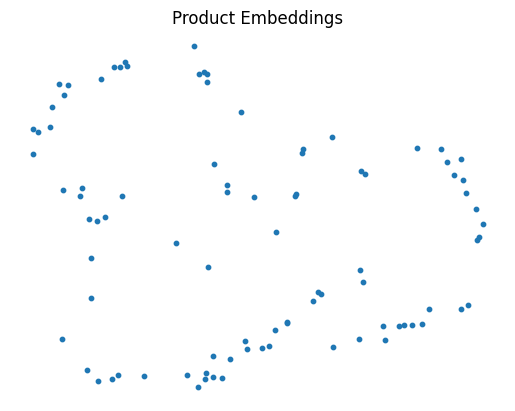

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(global_embeddings[:, 0], global_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Product Embeddings')
plt.axis('off')

## RAG Pipeline

In [ ]:
from langchain_ollama.chat_models import ChatOllama

model = ChatOllama(
  base_url=OLLAMA_URL,
  model=OLLAMA_CHAT_MODEL_ID,
  temperature=0.5
)

In [ ]:
prompts = {
    "system_prompt" : """
        You are RetailARVA Bot, a helpful AI assistant designed to act as a virtual sales representative for a retail store for skincare products.
        Your primary goal is to assist customers with their inquiries, provide detailed information about skincare products, help them find what they're looking for. Here are some key guidelines to follow:
        [Guidelines]
        - Friendly and Professional Tone: Always maintain a friendly and professional tone. Greet customers warmly and be courteous throughout the conversation.
        - Product Knowledge: Be knowledgeable about all the products listed in the store. Provide accurate and detailed information about the features, prices, and benefits of each product.
        - Customer Assistance: Help customers find products based on their needs and preferences. Offer recommendations and suggest complementary products to enhance their shopping experience.
        - Handling Queries: Respond promptly to customer queries. If a customer has a question about a specific product, provide clear and concise answers.
        - Problem Resolution: Address any issues or concerns the customers might have.
        - Personalization: Personalize interactions by using the customer's name if provided and referencing their past interactions or preferences.
""",
    "qa_prompt": """
    ## Instructions:
        - Provide factual information and assistance in helpful manner
        - Answer the given question based only on the provided context and the conversation history
        - Don't mention to user that you are getting information from a context.
        - If the context and chat history is not sufficient enough to answer the query, tell the user you do not know the answer and propose a suitable suggestion.
        - Avoid unnecessary lengthy responses.
        - Avoid making assumptions.
        - I will tip you $1000 if the user finds the answer helpful.
    <context>
    {context}
    </context>

""",
    "contextualize_q_system_prompt": """
        Given a chat history and the latest user question which might reference context in the chat history,
        formulate a standalone question which can be understood without the chat history.
        Do NOT answer the question, just reformulate it if needed and otherwise return it as is.
""",
    "greet_prompt": """
        Greet the user using a suitable greeting message.
"""
}

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

### Get product info by id without embedding

In [ ]:
from qdrant_client.http import models

product_id = 13

product_id_filter = models.Filter(
    must=[
        models.FieldCondition(
            key="metadata.id",
            match=models.MatchValue(value=product_id)
        )
    ]
)
# models.Filter(
#         should=[
#             models.FieldCondition(
#                 key="page_content",
#                 match=models.MatchValue(
#                     value="The top 10 soccer players in the world right now."
#                 ),
#             ),
#         ]
#     )

In [ ]:
# Retrieve documents matching the filter

docs = vectorstore.similarity_search(
    query="what is the price of Junsui Naturals Face Wash With Extra Whitening Radiance?",
    k=1,
    filter=product_id_filter,
)

### Retrieve product by similarity

In [ ]:
query = "what is the price of Junsui Naturals Face Wash With Extra Whitening Radiance?"

In [ ]:
# docs = vectorstore.similarity_search(
#     query=query,
#     k=2
# )

In [ ]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

In [ ]:
docs = retriever.invoke(input=query)

In [ ]:
import json

for doc in docs:
  print(f"----------------------------- product: {doc.metadata['id']} ------------------------------")
  print(json.dumps(doc.metadata, indent=4))

----------------------------- product: 13 ------------------------------
{
    "category": "Face Wash",
    "name": "Junsui Naturals Face Wash With Extra Whitening Radiance 100g",
    "id": 13,
    "brand": "Junsui",
    "price": 1217.3,
    "_id": "63952123-8de2-434f-8d76-ba28dfc6b928",
    "_collection_name": "products"
}
----------------------------- product: 41 ------------------------------
{
    "name": "OxyGlow Pearl Whitening Face Wash 100ml",
    "price": 1750.0,
    "id": 41,
    "brand": "OxyGlow",
    "category": "Face Wash",
    "_id": "cde7f8fe-1ba8-4064-a2a6-7c10a098411a",
    "_collection_name": "products"
}
----------------------------- product: 74 ------------------------------
{
    "category": "Face Wash",
    "price": 1750.0,
    "id": 74,
    "brand": "OxyGlow",
    "name": "OxyGlow Pearl Whitening Face Wash 100ml",
    "_id": "58218486-c50a-4d5a-92a7-17308c8a58a1",
    "_collection_name": "products"
}


### Format for context

In [ ]:
from langchain.docstore.document import Document

def format_docs(docs : List[Document]):
        return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
context = format_docs(docs)

In [ ]:
context

'Reveal your naturally radiant complexion with Junsui Naturals Face Wash With Extra Whitening Radiance. This 100g face wash, crafted with a blend of herbal extracts, gently cleanses while visibly whitening skin and adding a healthy glow.  Perfect for all skin types, this daily face wash effectively combats dullness and pigmentation. Simply apply to a wet face, lather, and rinse.  While generally suitable for all skin types, those with sensitivities to herbal extracts should exercise caution. Experience the power of nature with Junsui and unveil brighter, more luminous skin for just LKR 1217.30.\n\n\nReveal your naturally radiant complexion with OxyGlow Pearl Whitening Face Wash.  This 100ml face wash, enriched with the illuminating power of pearl extracts, gently cleanses while working to whiten and brighten skin for a more even tone.  Ideal for all skin types, this natural formula effectively combats dullness and uneven skin tone. Simply apply to a wet face, lather, and rinse daily fo

### Visualize retrieved vectors along with query vector

In [ ]:
def calc_global_embeddings(query, embeddings, docs, umap_transformer, embed_function, global_embeddings):
    q_embedding = embeddings.embed_query(query)
    vectors_content_vectors = embeddings.embed_documents([doc.page_content for doc in docs])

    query_embeddings = embed_function([q_embedding], umap_transformer)
    retrieved_embeddings = embed_function(vectors_content_vectors, umap_transformer)

    plt.figure()
    plt.scatter(global_embeddings[:, 0], global_embeddings[:, 1], s=10, color='gray')
    plt.scatter(query_embeddings[:, 0], query_embeddings[:, 1], s=150, marker='X', color='r')
    plt.scatter(retrieved_embeddings[:, 0], retrieved_embeddings[:, 1], s=50, facecolors='none', edgecolors='g')
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{query}')
    plt.axis('off')
    plt.show()

100%|██████████| 3/3 [00:00<00:00, 147.78it/s]


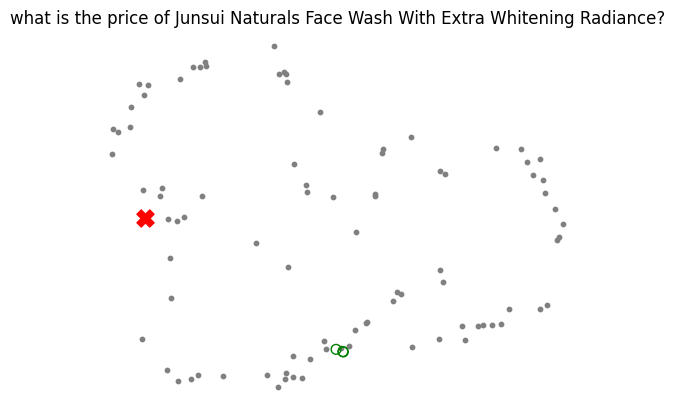

In [ ]:
calc_global_embeddings(query, embedding_model, docs, umap_transformer, umap_embed, global_embeddings)

### Query Expansion

In [ ]:
from langchain_core.output_parsers import StrOutputParser

class QuestionArrayOutputParser(StrOutputParser):
    def parse(self, text: str):
        # Split the text by newline characters to get individual questions
        questions = text.strip().split("\n\n")
        # Filter out any empty questions that might occur due to extra new lines
        questions = [q.strip() for q in questions if q.strip()]
        return questions


In [ ]:
from langchain.prompts import PromptTemplate

QUERY_PROMPT = PromptTemplate(
    input_variables=["query"],
    template="""You are an AI language model assistant. Your task is to generate three
    different versions of the given user question to retrieve relevant documents from a vector
    database. By generating multiple perspectives on the user question, your goal is to help
    the user overcome some of the limitations of the distance-based similarity search.

    Provide these alternative questions separated by newlines. Only provide the query, no numbering.

    [EXAMPLE]
    Original question: What are the best practices for managing a remote team?

    Alternative questions:
    How can managers effectively handle distributed teams?
    What strategies improve productivity in remote work environments?
    What are key approaches for leading virtual teams successfully?

    Original question: {query}""",
)

In [ ]:
q_expansion_chain = QUERY_PROMPT | model | QuestionArrayOutputParser()

In [ ]:
q_expansion_chain

PromptTemplate(input_variables=['query'], input_types={}, partial_variables={}, template='You are an AI language model assistant. Your task is to generate three\n    different versions of the given user question to retrieve relevant documents from a vector\n    database. By generating multiple perspectives on the user question, your goal is to help\n    the user overcome some of the limitations of the distance-based similarity search.\n\n    Provide these alternative questions separated by newlines. Only provide the query, no numbering.\n\n    Original question: {query}')
| ChatOllama(model='llama3.1:latest', temperature=0.5, base_url='https://select-organic-lacewing.ngrok-free.app/')
| QuestionArrayOutputParser()

In [ ]:
# https://github.com/langchain-ai/langchain/discussions/28287
# https://github.com/langchain-ai/langchain/issues/28281#issuecomment-2494605281
queries = q_expansion_chain.invoke(query)

In [ ]:
for expanded_query in queries:
  print(expanded_query)

What are the prices of face wash products with extra whitening radiance from brands similar to Junsui Naturals?
What is the average price of facial cleansers with skin brightening properties?
What are the top 3 priced products in the "whitening face wash" category on online marketplaces?


### Retrieval using expanded queries

In [ ]:
docs = [retriever.invoke(input=query) for query in queries]

In [ ]:
# Remove duplicate retrievals

unique_contents = set()
unique_docs = []
for sublist in docs:
    for doc in sublist:
        if doc.page_content not in unique_contents:
            unique_docs.append(doc)
            unique_contents.add(doc.page_content)
unique_contents = list(unique_contents)

In [ ]:
len(unique_contents)

7

In [ ]:
unique_contents

['Reveal your naturally radiant glow with Jovees Strawberry Face Wash. This 120ml cleanser, crafted with natural Strawberry Extracts and soothing Aloe Vera, is specially formulated for normal to dry skin types.  It gently washes away dullness and dryness, leaving your skin feeling moisturized and brighter.  For daily use, simply apply to a wet face, lather, and rinse.  Experience the sheer moisture and luminous skin you deserve with this nourishing and effective face wash from Jovees. Priced at LKR 1710.00.\n',
 'Prevense Fair Intense 2 For All Skin Types is a natural whitening treatment suitable for all skin types. This 50ml brightening solution is formulated with whitening extracts to address dullness and uneven skin tone.  Simply apply daily to a cleansed face and massage in.  Experience a visibly brighter, more radiant complexion with Prevense Fair Intense 2.  Priced at LKR2115.00.\n',
 'Reveal your naturally radiant complexion with Junsui Naturals Face Wash With Extra Whitening Ra

100%|██████████| 7/7 [00:00<00:00, 258.99it/s]


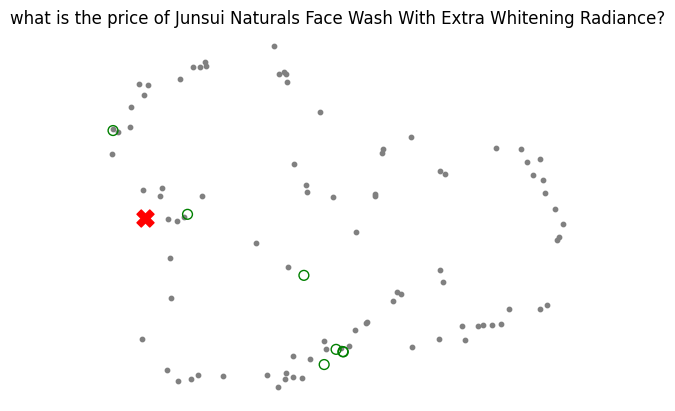

In [ ]:
from langchain.schema import Document

calc_global_embeddings(query, embedding_model, [Document(page_content=doc) for doc in unique_contents], umap_transformer, umap_embed, global_embeddings)

### Rerank using the BERT cross encoder

In [ ]:
from sentence_transformers import CrossEncoder
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# create query and retrieved document pairs for reranking
pairs = []
for doc in unique_contents:
    pairs.append([query, doc])

In [ ]:
scores = cross_encoder.predict(pairs)
scores

array([-0.17874435, -0.21204603,  6.2478857 ,  2.4545326 , -1.1123807 ,
        1.5223377 , -4.756909  ], dtype=float32)

In [ ]:
scored_docs = zip(scores, unique_contents)
sorted_docs = sorted(scored_docs, reverse=True)
sorted_docs

[(6.2478857,
  'Reveal your naturally radiant complexion with Junsui Naturals Face Wash With Extra Whitening Radiance. This 100g face wash, crafted with a blend of herbal extracts, gently cleanses while visibly whitening skin and adding a healthy glow.  Perfect for all skin types, this daily face wash effectively combats dullness and pigmentation. Simply apply to a wet face, lather, and rinse.  While generally suitable for all skin types, those with sensitivities to herbal extracts should exercise caution. Experience the power of nature with Junsui and unveil brighter, more luminous skin for just LKR 1217.30.\n'),
 (2.4545326,
  'Reveal your naturally radiant complexion with OxyGlow Pearl Whitening Face Wash.  This 100ml face wash, enriched with the illuminating power of pearl extracts, gently cleanses while working to whiten and brighten skin for a more even tone.  Ideal for all skin types, this natural formula effectively combats dullness and uneven skin tone. Simply apply to a wet f

In [ ]:
# Get top 5 documents
reranked_docs = [doc for _, doc in sorted_docs][0:5]
reranked_docs

['Reveal your naturally radiant complexion with Junsui Naturals Face Wash With Extra Whitening Radiance. This 100g face wash, crafted with a blend of herbal extracts, gently cleanses while visibly whitening skin and adding a healthy glow.  Perfect for all skin types, this daily face wash effectively combats dullness and pigmentation. Simply apply to a wet face, lather, and rinse.  While generally suitable for all skin types, those with sensitivities to herbal extracts should exercise caution. Experience the power of nature with Junsui and unveil brighter, more luminous skin for just LKR 1217.30.\n',
 'Reveal your naturally radiant complexion with OxyGlow Pearl Whitening Face Wash.  This 100ml face wash, enriched with the illuminating power of pearl extracts, gently cleanses while working to whiten and brighten skin for a more even tone.  Ideal for all skin types, this natural formula effectively combats dullness and uneven skin tone. Simply apply to a wet face, lather, and rinse daily 

### Addressing Lost in the Model problem

In [ ]:
from langchain_community.document_transformers import (
    LongContextReorder
)

In [ ]:
reordering = LongContextReorder()
reordered_docs = reordering.transform_documents(reranked_docs)
reordered_docs

['Reveal your naturally radiant complexion with Junsui Naturals Face Wash With Extra Whitening Radiance. This 100g face wash, crafted with a blend of herbal extracts, gently cleanses while visibly whitening skin and adding a healthy glow.  Perfect for all skin types, this daily face wash effectively combats dullness and pigmentation. Simply apply to a wet face, lather, and rinse.  While generally suitable for all skin types, those with sensitivities to herbal extracts should exercise caution. Experience the power of nature with Junsui and unveil brighter, more luminous skin for just LKR 1217.30.\n',
 'Reveal your naturally radiant complexion with OxyGlow Pearl Whitening Face Wash. This 100ml cleanser, enriched with natural pearl extracts, gently brightens and cleanses all skin types, effectively addressing dullness and uneven tone.  For daily use, simply apply to a wet face, lather, and rinse.  Experience the illuminating power of pearls for a naturally luminous glow. Priced at LKR 175

In [ ]:
len(reordered_docs)

5

100%|██████████| 5/5 [00:00<00:00, 163.80it/s]


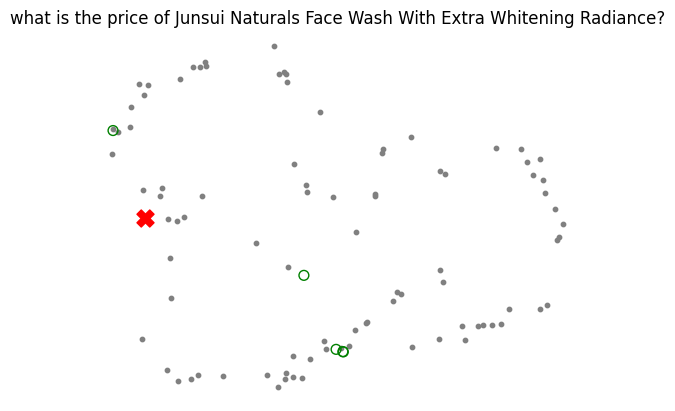

In [ ]:
from langchain.schema import Document

calc_global_embeddings(query, embedding_model, [Document(page_content=doc) for doc in reordered_docs], umap_transformer, umap_embed, global_embeddings)

### Generation

In [ ]:
# chat_prompt = ChatPromptTemplate.from_messages(
#     [
#         ("system", f"{prompts['system_prompt']} \n {prompts['qa_prompt']}"),
#         ("human", "{input}")
#     ]
# )

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_history_aware_retriever

contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", prompts['contextualize_q_system_prompt']),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

history_aware_retriever = create_history_aware_retriever(
    model, retriever, contextualize_q_prompt
)

In [ ]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", f"{prompts['system_prompt']} \n {prompts['qa_prompt']}"),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

In [ ]:
qa_chain = create_stuff_documents_chain(model, prompt=qa_prompt)

In [ ]:
rag_chain = create_retrieval_chain(history_aware_retriever, qa_chain)

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage

In [ ]:
chat_history = []

In [ ]:
user_query = "what is the price of Junsui Naturals Face Wash With Extra Whitening Radiance?"

In [ ]:
from langchain.schema import Document

# Convert reordered_docs (strings) back to Document objects
reordered_docs = [Document(page_content=doc) for doc in reordered_docs]

# Combine the content for the context
context = " ".join([doc.page_content for doc in reordered_docs])

In [ ]:
reordered_docs

[Document(metadata={}, page_content='Reveal your naturally radiant complexion with Junsui Naturals Face Wash With Extra Whitening Radiance. This 100g face wash, crafted with a blend of herbal extracts, gently cleanses while visibly whitening skin and adding a healthy glow.  Perfect for all skin types, this daily face wash effectively combats dullness and pigmentation. Simply apply to a wet face, lather, and rinse.  While generally suitable for all skin types, those with sensitivities to herbal extracts should exercise caution. Experience the power of nature with Junsui and unveil brighter, more luminous skin for just LKR 1217.30.\n'),
 Document(metadata={}, page_content='Reveal your naturally radiant complexion with OxyGlow Pearl Whitening Face Wash. This 100ml cleanser, enriched with natural pearl extracts, gently brightens and cleanses all skin types, effectively addressing dullness and uneven tone.  For daily use, simply apply to a wet face, lather, and rinse.  Experience the illumi

In [ ]:
response = qa_chain.invoke({
    "input": query,
    "context": reordered_docs,
    "chat_history": chat_history
})

In [ ]:
response

'The price of Junsui Naturals Face Wash With Extra Whitening Radiance is LKR 1217.30 for a 100g face wash. Would you like to know more about this product or perhaps find a complementary product to enhance your skincare routine?'

In [ ]:
chat_history.extend([
    HumanMessage(content=user_query),
    AIMessage(content=response)
])

In [ ]:
chat_history

[HumanMessage(content='what is the price of Junsui Naturals Face Wash With Extra Whitening Radiance?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='The price of Junsui Naturals Face Wash With Extra Whitening Radiance is LKR 1217.30 for a 100g face wash. Would you like to know more about this product or perhaps find a complementary product to enhance your skincare routine?', additional_kwargs={}, response_metadata={})]

### Demo using Gradio UI

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
from langchain_core.output_parsers import StrOutputParser
from sentence_transformers import CrossEncoder
from langchain_community.document_transformers import (
    LongContextReorder
  )
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_history_aware_retriever
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.runnables.base import RunnableSerializable
from langchain.schema import Document
from langchain.prompts import PromptTemplate

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

In [ ]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
  [
      ("system", prompts['contextualize_q_system_prompt']),
      MessagesPlaceholder("chat_history"),
      ("human", "{input}"),
  ]
)

history_aware_retriever = create_history_aware_retriever(
  model, retriever, contextualize_q_prompt
)

qa_prompt = ChatPromptTemplate.from_messages(
  [
      ("system", f"{prompts['system_prompt']} \n {prompts['qa_prompt']}"),
      MessagesPlaceholder("chat_history"),
      ("human", "{input}"),
  ]
)

In [ ]:
qa_chain = create_stuff_documents_chain(model, prompt=qa_prompt)
rag_chain = create_retrieval_chain(history_aware_retriever, qa_chain)

In [ ]:
chat_history = []

In [ ]:
def run(query):
  q_expansion_chain = QUERY_PROMPT | model | QuestionArrayOutputParser()
  queries = q_expansion_chain.invoke(query)

  for expanded_query in queries:
    print("<----------------------- Expanded Queries ------------------------------------>")
    print(expanded_query)

  docs = [retriever.invoke(input=query) for query in queries]

  # Remove duplicate retrievals

  unique_contents = set()
  unique_docs = []
  for sublist in docs:
    for doc in sublist:
        if doc.page_content not in unique_contents:
            unique_docs.append(doc)
            unique_contents.add(doc.page_content)
  unique_contents = list(unique_contents)
  print(f"{len(unique_contents)} docs retrieved from query expansion")

  # create query and retrieved document pairs for reranking
  pairs = []
  for doc in unique_contents:
    pairs.append([query, doc])

  scores = cross_encoder.predict(pairs)
  print(f"scores from cross encoder for {len(unique_contents)} docs: {scores}")

  # sort documents by their scores
  scored_docs = zip(scores, unique_contents)
  sorted_docs = sorted(scored_docs, reverse=True)

  # Get top 5 documents
  reranked_docs = [doc for _, doc in sorted_docs][0:5]
  reranked_docs

  # address lost in the middle by reordering
  reordering = LongContextReorder()
  reordered_docs = reordering.transform_documents(reranked_docs)

  # Convert reordered_docs (strings) back to Document objects
  reordered_docs = [Document(page_content=doc) for doc in reordered_docs]

  response = qa_chain.invoke({
    "input": query,
    "context": reordered_docs,
    "chat_history": chat_history
  })

  chat_history.extend([
    HumanMessage(content=query),
    AIMessage(content=response)
  ])

  return response

In [ ]:
def chat_fucntion(message, history: list):
    print(f"history: {history}")
    chat_response = run(message)
    return chat_response

In [ ]:
parser = StrOutputParser()

In [ ]:
def greet() -> str:
        prompt = PromptTemplate.from_template(f"{prompts['system_prompt']}\n{prompts['greet_prompt']}")
        llm_chain : RunnableSerializable = prompt | model | parser

        response = llm_chain.invoke({})

        chat_history.extend([
          AIMessage(content=response)
        ])

        return response

In [ ]:
def greet_user():
    greeting = greet()
    return greeting

In [ ]:
user_query = "what is the price of Junsui Naturals Face Wash With Extra Whitening Radiance?"

In [ ]:
import gradio as gr
# https://github.com/gradio-app/gradio/issues/9463
# https://github.com/gradio-app/gradio/issues/9962

gr.ChatInterface(
    fn=chat_fucntion,
    title="RetailARVA Bot",
    chatbot=gr.Chatbot(height=500, value=[[None, greet_user()]]),
    textbox=gr.Textbox(placeholder="Message chatbot", container=False, scale=7),
    theme=gr.themes.Monochrome(),
    submit_btn="Send",
    stop_btn="Stop",
).launch(share=True, debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:237: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f5904eae8a8dfb2eba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


history: []
<----------------------- Expanded Queries ------------------------------------>
Original question: what can you do for me?
<----------------------- Expanded Queries ------------------------------------>
Alternative questions:
What services or features can I utilize with your assistance?
How can you assist me in achieving my goals or solving a problem?
Can you provide information on the capabilities and functions of our interaction?
5 docs retrieved from query expansion
scores from cross encoder for 5 docs: [-8.314337  -8.192134  -7.93719   -7.68518   -7.8239484]


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2029, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1835, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py", line 551, in postprocess
    self._check_format(value, "tuples")
  File "/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py", line 349, in _check_format
    raise Error(
gradio.exceptions.Error: 'Data incompatible with tuples format. Each me

In [ ]:
# prompt: explain the reason for gradio.exceptions.Error: 'Data incompatible with tuples format. Each message should be a list of length 2.' error

gr.Chatbot(height=500, value=[[None, greet_user()]])